In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math
import seaborn as sns
import sklearn
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
%matplotlib inline
sns.set_style('white')
import warnings
# Suppress annoying harmless error.
warnings.simplefilter('ignore')

Now it's time for another guided example. This time we're going to look at recipes. Specifically we'll use the epicurious dataset, which has a collection of recipes, key terms and ingredients, and their ratings.

What we want to see is if we can use the ingredient and keyword list to predict the rating. For someone writing a cookbook this could be really useful information that could help them choose which recipes to include because they're more likely to be enjoyed and therefore make the book more likely to be successful.

First let's load the dataset. It's [available on Kaggle](https://www.kaggle.com/hugodarwood/epirecipes). We'll use the csv file here and as pull out column names and some summary statistics for ratings.

In [2]:
raw_data = pd.read_csv('epi_r.csv')

In [3]:
list(raw_data.columns)

['title',
 'rating',
 'calories',
 'protein',
 'fat',
 'sodium',
 '#cakeweek',
 '#wasteless',
 '22-minute meals',
 '3-ingredient recipes',
 '30 days of groceries',
 'advance prep required',
 'alabama',
 'alaska',
 'alcoholic',
 'almond',
 'amaretto',
 'anchovy',
 'anise',
 'anniversary',
 'anthony bourdain',
 'aperitif',
 'appetizer',
 'apple',
 'apple juice',
 'apricot',
 'arizona',
 'artichoke',
 'arugula',
 'asian pear',
 'asparagus',
 'aspen',
 'atlanta',
 'australia',
 'avocado',
 'back to school',
 'backyard bbq',
 'bacon',
 'bake',
 'banana',
 'barley',
 'basil',
 'bass',
 'bastille day',
 'bean',
 'beef',
 'beef rib',
 'beef shank',
 'beef tenderloin',
 'beer',
 'beet',
 'bell pepper',
 'berry',
 'beverly hills',
 'birthday',
 'biscuit',
 'bitters',
 'blackberry',
 'blender',
 'blue cheese',
 'blueberry',
 'boil',
 'bok choy',
 'bon appétit',
 'bon app��tit',
 'boston',
 'bourbon',
 'braise',
 'bran',
 'brandy',
 'bread',
 'breadcrumbs',
 'breakfast',
 'brie',
 'brine',
 'brisk

In [4]:
raw_data.rating.describe()

count    20052.000000
mean         3.714467
std          1.340829
min          0.000000
25%          3.750000
50%          4.375000
75%          4.375000
max          5.000000
Name: rating, dtype: float64

In [6]:
raw_data.shape

(20052, 680)

We learn a few things from this analysis. From a ratings perspective, there are just over 20,000 recipes with an average rating of 3.71. What is interesting is that the 25th percentile is actually above the mean. This means there is likely some kind of outlier population. This makes sense when we think about reviews: some bad recipes may have very few very low reviews.

Let's validate the idea a bit further with a histogram.

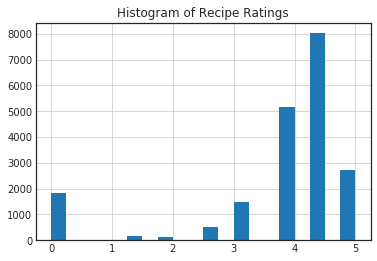

In [7]:
raw_data.rating.hist(bins=20)
plt.title('Histogram of Recipe Ratings')
plt.show()

So a few things are shown in this histogram. Firstly there are sharp discontinutities. We don't have continuous data. No recipe has a 3.5 rating, for example. Also we see the anticipated increase at 0.

Let's try a naive approach again, this time using SVM Regressor. But first, we'll have to do a bit of data cleaning.

In [8]:
# Count nulls 
null_count = raw_data.isnull().sum()
null_count[null_count>0]

calories    4117
protein     4162
fat         4183
sodium      4119
dtype: int64

What we can see right away is that nutrition information is not available for all goods. Now this would be an interesting data point, but let's focus on ingredients and keywords right now. So we'll actually drop the whole columns for calories, protein, fat, and sodium. We'll come back to nutrition information later.

In [9]:
from sklearn.svm import SVR
svr = SVR()
X = raw_data.drop(['rating', 'title', 'calories', 'protein', 'fat', 'sodium'], 1)
Y = raw_data.rating
svr.fit(X,Y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

__Note that this actually takes quite a while to run, compared to some of the models we've done before. Be patient.__ It's because of the number of features we have.

Let's see what a scatter plot looks like, comparing actuals to predicted.

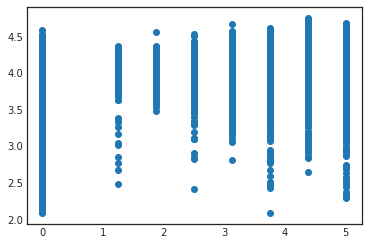

In [10]:
plt.scatter(Y, svr.predict(X))

Now that is a pretty useless visualization. This is because of the discontinous nature of our outcome variable. There's too much data for us to really see what's going on here. If you wanted to look at it you could create histograms, here we'll move on to the scores of both our full fit model and with cross validation. Again if you choose to run it again it will take some time, so you probably shouldn't.

In [11]:
svr.score(X, Y)

0.03856570651298896

In [12]:
from sklearn.model_selection import cross_val_score
cross_val_score(svr, X, Y, cv=5)

array([0.01818511, 0.026411  , 0.03037705, 0.01957949, 0.02451197])

Oh dear, so this did seem not to work very well. In fact it is remarkably poor. Now there are many things that we could do here. 

Firstly the overfit is a problem, even though it was poor in the first place. We could go back and clean up our feature set. There might be some gains to be made by getting rid of the noise.

We could also see how removing the nulls but including dietary information performs. Though its a slight change to the question we could still possibly get some improvements there.

Lastly, we could take our regression problem and turn it into a classifier. With this number of features and a discontinuous outcome, we might have better luck thinking of this as a classification problem. We could make it simpler still by instead of classifying on each possible value, group reviews to some decided high and low values.

__And that is your challenge.__

Transform this regression problem into a binary classifier and clean up the feature set. You can choose whether or not to include nutritional information, but try to cut your feature set down to the 30 most valuable features.

Good luck!

## Create Binary Response ##

* We code ratings of 4 and higher as 1


In [14]:
raw_data['ratingclass'] = np.where(raw_data['rating']>= 4, 1, 0)

In [16]:
y_class = raw_data.ratingclass

In [20]:
y_class.describe()

count    20052.000000
mean         0.535508
std          0.498750
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: ratingclass, dtype: float64

* Data is reasonably balanced

* About 53% of data is rated 4 or higher

* We now import SVC and fit out first model.

* We use the same Bag of Words subset X of the dataset.

In [17]:
from sklearn.svm import SVC
svc = SVC()

svc.fit(X,y_class)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [18]:
svc.score(X, y_class)

0.5907141432276082

* Accuracy score shows a reasonable ability to classify.

* Note that simply classifying data as '1' (4 or better) will give us a 53% accuracy by default.

* We now run a 5-fold CV on the dataset.

In [19]:
cross_val_score(svc, X, y_class, cv=5)

array([0.56743954, 0.57466966, 0.57317377, 0.56907731, 0.57894737])

* 5-fold CV gives a stable out-of-sample around 57% accuracy.

* This is only a modest improvement over the 53% accuracy of the naive classifier.

* We use a PCA on the bag of Words data to improve prediction by throwing away noisy data.

* A PCA also improves the speed of estimation.

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 

# scale the input into mean 0 and standardized variance

scaled_X = StandardScaler().fit_transform(X)

pca = PCA(n_components=30)
newX = pca.fit_transform(scaled_X)

print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[0.01105031 0.0090664  0.00730454 0.00538388 0.00484222 0.00443187
 0.00404295 0.00383212 0.00366991 0.00362724 0.00349688 0.00342133
 0.00339556 0.00335433 0.0033012  0.00315197 0.00311994 0.00306492
 0.00299445 0.00294984 0.00293816 0.0028778  0.00284757 0.00281696
 0.00276542 0.00274938 0.0027087  0.00268112 0.0026223  0.00259572]
[386.4524356  350.04689307 314.1992836  269.74703228 255.81799793
 244.73845086 233.75353108 227.57709803 222.70850069 221.40982334
 217.39486617 215.03348642 214.22236049 212.91755018 211.22479914
 206.39525662 205.34403737 203.5251506  201.17185551 199.66795589
 199.27210531 197.21463648 196.17599417 195.11884325 193.32565467
 192.76417754 191.33278294 190.35630553 188.25648682 187.30010109]


### Results of PCA ###

In [22]:
cross_val_score(svc, newX, y_class, cv=5)

array([0.59985041, 0.59835453, 0.60184493, 0.61770574, 0.60114742])

* 5-fold CV shows another modest improvement over the uncompressed Bag of Words data.

* We average around 60% accuracy.

In [23]:
svclinear = SVC(kernel='linear')

In [24]:
cross_val_score(svclinear, newX, y_class, cv=5)

array([0.55721765, 0.56220394, 0.55646971, 0.55785536, 0.56023946])

* Using a linear SVC over the RBF kernel shows a decrease in accuracy.

* It is clear that the RBF kernel improves accuracy.

* We now include nutritional information (calories, protein, fat, and sodium).

* I impute the column means in order to deal with the missing data.

* Next I concatenate the datasets and reestimate.

In [26]:
nutrition = raw_data[['calories', 'protein', 'fat', 'sodium']]
nutrition.fillna(nutrition.mean(), inplace=True)

In [28]:
newDataX = np.concatenate([newX, nutrition], axis=1)

In [29]:
cross_val_score(svc, newDataX, y_class, cv=5)

array([0.61281476, 0.6170531 , 0.61106956, 0.62418953, 0.61785982])

* The additional data gives us a small increase in accuracy.

* We now average around 61% out-of-sample CV accuracy.

When you've finished that, also take a moment to think about bias. Is there anything in this dataset that makes you think it could be biased, perhaps extremely so?

There is. Several things in fact, but most glaringly is that we don't actually have a random sample. It could be, and probably is, that the people more likely to choose some kinds of recipes are more likely to give high reviews.

After all, people who eat chocolate _might_ just be happier people.